In [259]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or on Kaggle, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
try:
    import google.colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

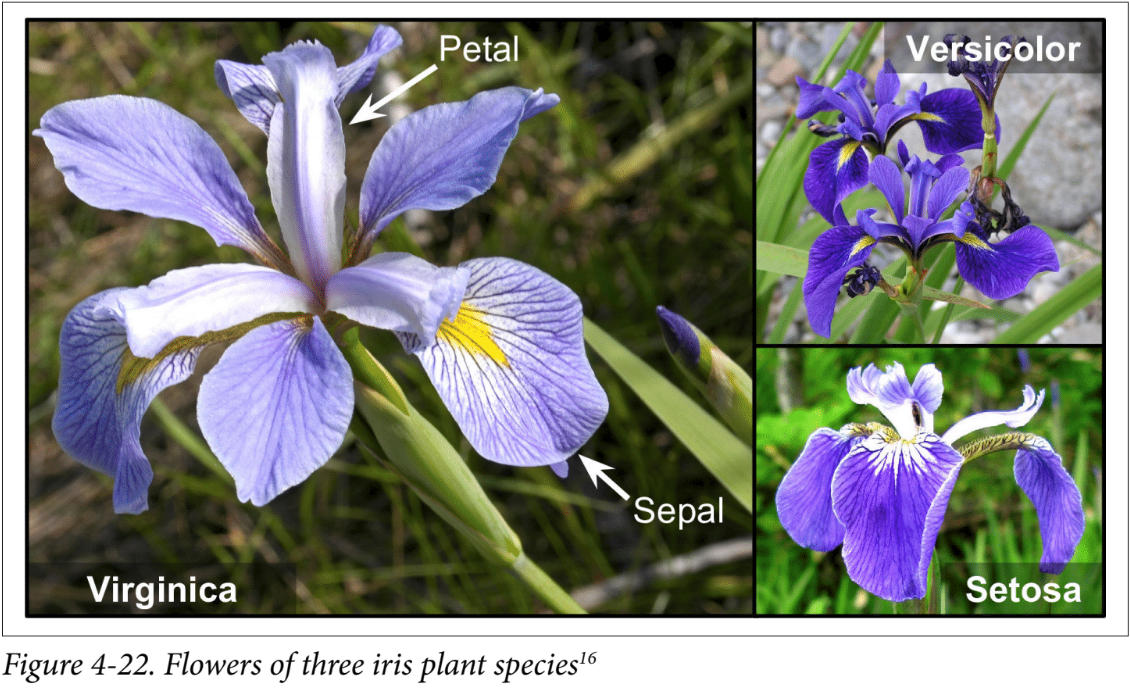

In [260]:
#importerer 2 funksjoner.
# imaget -> brukes til å hente et bilde.
# display -> viser objektet, altså bilde direkte i notatblokken

from IPython.display import Image, display
display(Image("https://raw.githubusercontent.com/HVL-ML/DAT158/main/notebooks/assets/iris.png", width="60%"))

In [261]:
#lynrask matematikk + arrays + vektoroperasjoner
import numpy as np
#Pandas er bygget oppå NumPy, men legger til datastrukturer og verktøy for databehandling.
import pandas as pd
#brukes til å lage grafer, diagrammer og figurer direkte i notebooken.m
import matplotlib.pyplot as plt

In [262]:
# To make the notebook reproducible, we set the random seed
np.random.seed(42)

# We set up Matplotlib to display plots directly in the notebook:
%matplotlib inline

In [263]:
import sklearn

In [264]:
from sklearn.datasets import load_iris

In [217]:
#?load_iris

In [218]:
#??load_iris

In [265]:
iris_dataset = load_iris()

In [220]:
#iris_dataset

In [221]:
#DESCR gir beskrivelsen av datasettet (DESCR -> descriprion
#print(iris_dataset['DESCR'])

In [266]:
#lister alle features i iris datasettet:
features = iris_dataset['feature_names']
print(f"Features: {features}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [223]:
#printer labels i datasettet:
print(f"Labels: {iris_dataset['target_names']}")

Labels: ['setosa' 'versicolor' 'virginica']


In [224]:
#hvor mye data har vi? :
#viser alle feature altså koonner, dette inkluderer ikke labels
iris_dataset['data'].shape
#vi ser av vi har et datasett som inneholder 150 rader og 4 kolonner. hver rad heter sample og hver kolonne heter feature

(150, 4)

In [225]:
iris_dataset['target']
#her får vi ut alle labels til hver blomst. 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [226]:
#0, 1, 2 som står over representerer disse:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [227]:
#når vi jobber med datasett som inneholder teskt, er det veldig lurt å samle all data i en pandas dataframe!
#når vi lage en dataframe får vi en data struktur som kan minnes om en excel struktur. vi får en 2D tabell med kolonner og rader.
iris_df = pd.DataFrame(iris_dataset['data'], columns=features)
#iris_dataset['data'] sier hvilket datasett vi skal bruke og columns=features setter navn på kolonnene.

In [228]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [229]:
#her legger vi til label til hver sample. (husk: sample -> hvre rad!)
iris_df['label'] = iris_dataset['target']

In [230]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Visualize the data

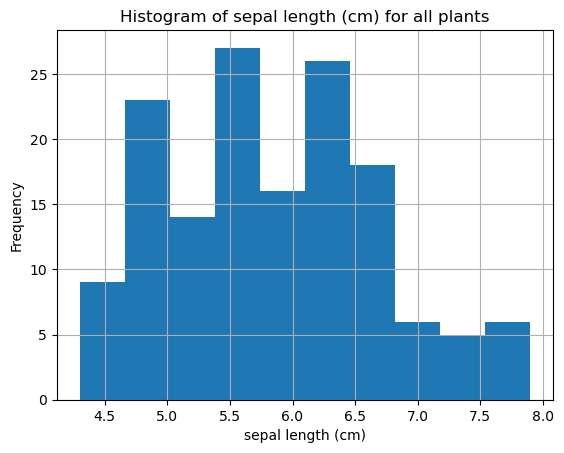

In [231]:
# Set the feature name
#dette navnet må matche en av featurene. ellers kan vi ikke skriver under: iris_df[feat]....
feat = 'sepal length (cm)'

# Create a histogram of the specified feature for all the plants

#Dette lager et nytt figurobjekt (fig) og en akse (ax) hvor du kan tegne grafen.
fig, ax = plt.subplots()
#iris_df[feat] → alle tallene i kolonnen “sepal length (cm)”
#.hist() → Pandas-metode som bruker Matplotlib bak kulissene for å lage histogrammet
#ax=ax → forteller at grafen skal tegnes på den aksen du opprettet over (ikke en ny tilfeldig figur)
#denne kodelinjen henter altså alle samples ut i fra iris datafeamen vi lagde, med hensyn på [feat] og plotter dette i et histogram men en gitt mengde bins
iris_df[feat].hist(ax=ax)
ax.set_xlabel(feat)
ax.set_ylabel('Frequency')
ax.set_title(f"Histogram of {feat} for all plants")
plt.show()

In [232]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

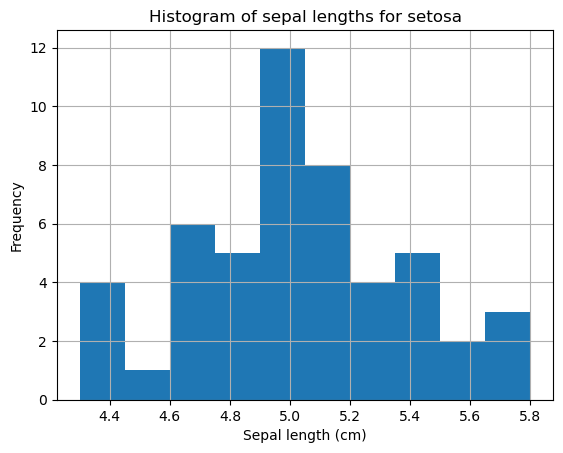

In [233]:
#denne koden fungerer helt likt som den over. vi heter fortsatt ut iris basert på sepal length, eneste forskjellen er at
#i koden over henter vi ut alle iris sampels, men her heter vi kun ut iris som har label = 0, altså den første label, og det kan
#vi se over at dette er setosa
#koden er så å si lik som den over bare at vi legger til et argument eksatra i hist funksjonen
#altså: [iris_df['label'] == plant_label]


# Set the plant label
plant_label = 0 # Iris-Setosa

# Create a histogram of the sepal lengths for the specified plant
fig, ax = plt.subplots()
iris_df[feat][iris_df['label'] == plant_label].hist(ax=ax)
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Frequency')
ax.set_title(f"Histogram of sepal lengths for {iris_dataset.target_names[plant_label]}")
plt.show()

**Scatter plots** are used to visualize the relationship between two variables. Each dot in the plot represents a single data point, with its position determined by the values of its two attributes. Such plots can help us explore how the various features differ among the different plants.

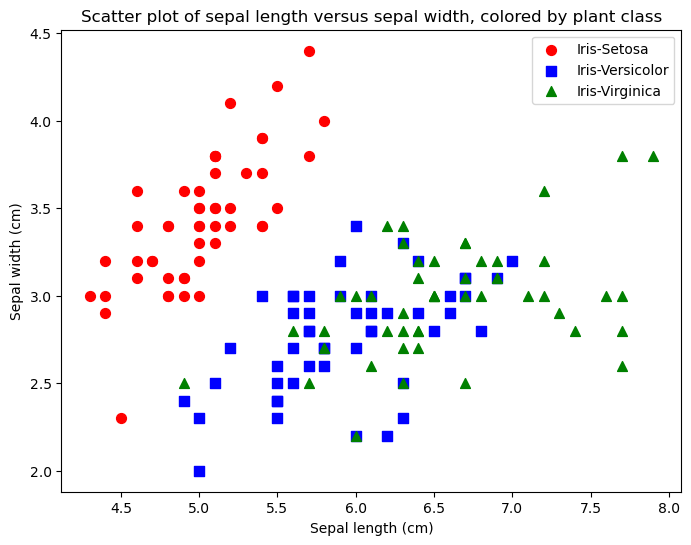

In [234]:
#her lager vi en scatter plot, som plotter alle de for skjellige klassene (labelsene) opp i mot 2 variabler
# i dette tilfeller er det sepal length vs sepal width.

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x=iris_df[iris_df['label'] == 0]['sepal length (cm)'], y=iris_df[iris_df['label'] == 0]['sepal width (cm)'], 
           color='red', label='Iris-Setosa', s=50, marker='o')

ax.scatter(x=iris_df[iris_df['label'] == 1]['sepal length (cm)'], y=iris_df[iris_df['label'] == 1]['sepal width (cm)'], 
           color='blue', label='Iris-Versicolor', s=50, marker='s')

ax.scatter(x=iris_df[iris_df['label'] == 2]['sepal length (cm)'], y=iris_df[iris_df['label'] == 2]['sepal width (cm)'], 
           color='green', label='Iris-Virginica', s=50, marker='^')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Scatter plot of sepal length versus sepal width, colored by plant class')

#det er denne koden som viser den lille "boksen" med info oppe i høyre gjørne.
ax.legend()

plt.show()

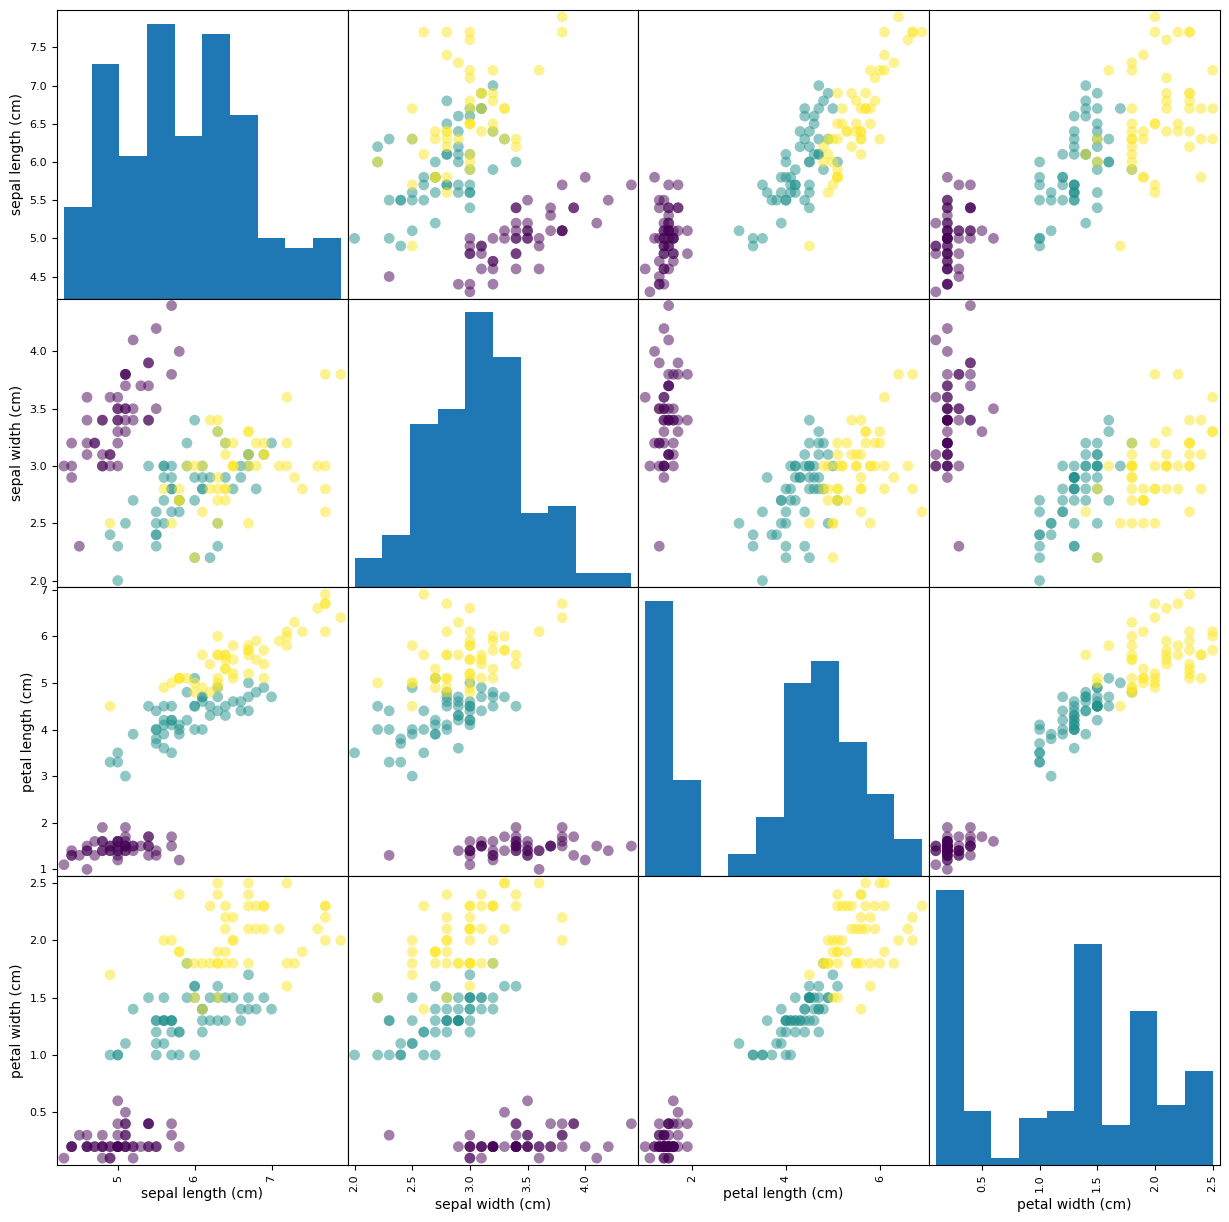

In [235]:
#Denne linjen er faktisk en av de kraftigste én-linjers visualiseringene du kan lage med Pandas og Matplotlib,
#fordi den viser alle mulige sammenhenger mellom features i datasettet på én gang
pd.plotting.scatter_matrix(iris_df[features], c=iris_df['label'], figsize=(15,15), marker='o', s=60)
plt.show()
#med å gjøre dette kan vi se om dataene er litt sprett fra hverandre. hvis vi finner en sammenligning som gi at forskjellige labels har
#vidt forskjellige verdier, kan vi lage en suksessfull maskinlæringsmodell som greier å finne riktig output fra en gitt input.

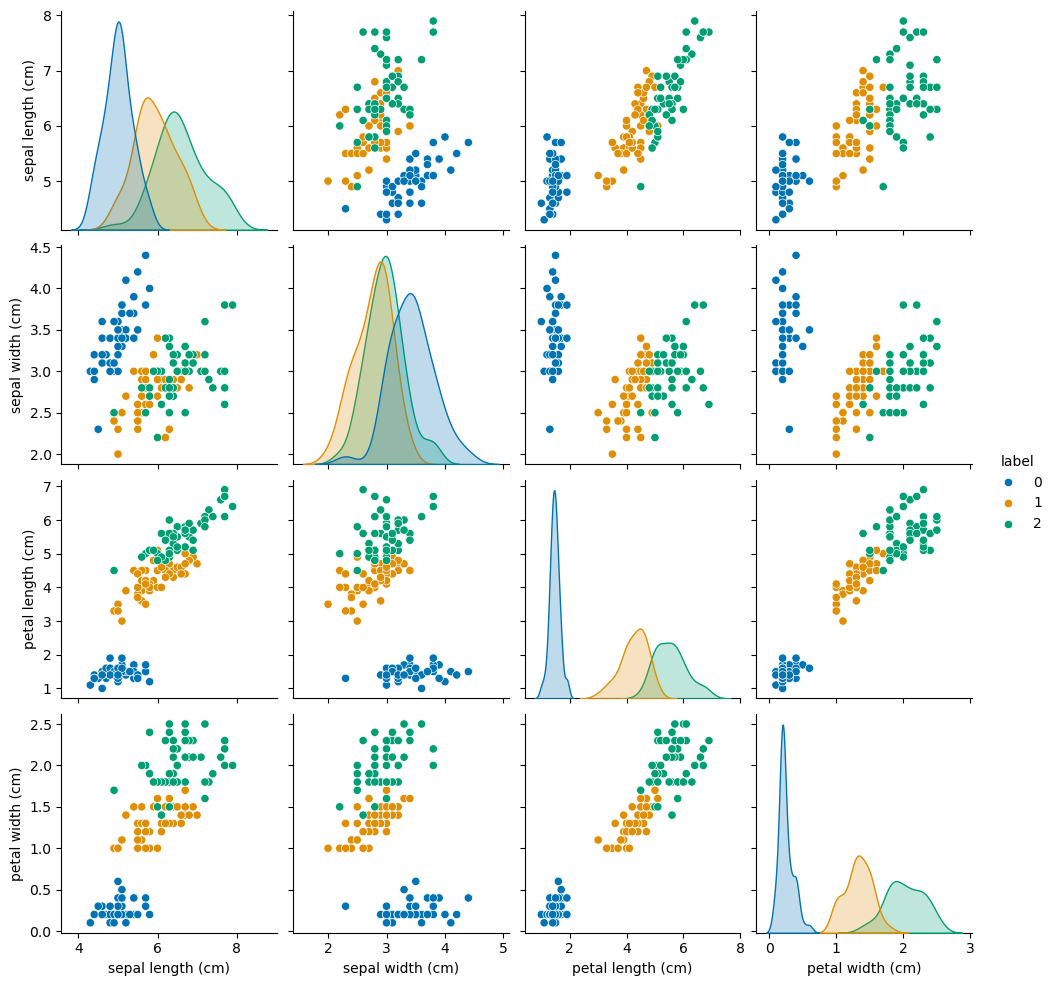

In [236]:
import seaborn as sns
sns.pairplot(iris_df, hue='label', palette="colorblind")
plt.show()
#dette er en annen måte vi kan visuallisere sammenhengen mellom forskjellige klasser. her bruker vi seaborn som gir oss
#et effektivt verktøy kalt pairplot: 

> Visualization of data forms a crucial part of applied machine learning. Carefully designed plots can reveal patterns in the data, which we can exploit when constructing predictive machine learning models. 

> More generally, **exploratory data analysis** using **plots**, **visualizations**, **statistics**, **probability**, and **baseline models** is a core part of all practical machine learning projects. We'll see that again and again throughout the course.

## Feature engineering / selecting features to use

Feature engineering is the process of selecting, transforming, or creating the most relevant variables (or "features") to improve the performance of our machine learning models. It's a craft that's equal parts art and science, requiring domain knowledge, intuition, and a good understanding of the data.


In [237]:
# We select the 0'th and 1'st columns since these correspond to sepal length and width:
#her sier vi at x skal ta alle rader, men bare kolonne 0 og 1.
X = iris_dataset['data'][:, [0, 1]]
#her henter y ut fasitne, altså label til alle radene.
y = iris_dataset['target']

In [238]:
#så nå har vi alle radene sidne sepal length og width lagret i x
X.shape

(150, 2)

In [239]:
#og deres klasse/label/target lagret i y:
y.shape

(150,)

In [240]:
#her er de 5 første målingene med deres tilhørende labels:

In [241]:
print(X[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [242]:
print(y[:5])

[0 0 0 0 0]


In [243]:
#denne koden er praktisk når vi vil blant annet finne ut hvilket tall som representerer hvilket target/class/label
list(zip(range(len(y)), iris_dataset['target_names']))
#her kan vi se an o = setosa, 1 = versicolor, osv...
#zip stopper når den minste listen er ferdig. her er target_names minst, den inneholder bare 3 elementer, mens len(y) inneholder
#150 elementer, så koden stopper når targen_names er ferdig.
#koden i seg selv legger sammen 2 eller flere lister.

[(0, np.str_('setosa')), (1, np.str_('versicolor')), (2, np.str_('virginica'))]

# Training and test data

Scikit-learn has a convenient train_test_split function that we'll use to set aside 25% of our data (including the corresponding labels) to be used as test data:

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [246]:
print(f'Training data: {X_train.shape}\nTest data: {X_test.shape}')

Training data: (112, 2)
Test data: (38, 2)


In [247]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'][0:2])

In [248]:
iris_df.head(5)

,sepal length (cm),sepal width (cm)
0,5.0,3.6
1,5.2,4.1
2,5.8,2.7
3,6.0,3.4
4,6.7,3.1


In [249]:
iris_df_test = pd.DataFrame(X_test, columns=iris_dataset['feature_names'][0:2])
iris_df_test.head(5)

,sepal length (cm),sepal width (cm)
0,6.1,2.8
1,5.7,3.8
2,7.7,2.6
3,6.0,2.9
4,6.8,2.8


# Machine learning model

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [272]:
rf = RandomForestClassifier(random_state=42, n_estimators=100) # random_state for reproducibility

rf.fit(X_train, y_train)

In [275]:
#rf.get_params()

## Evaluate the model

In [276]:
y_pred = rf.predict(X_test)

In [277]:
from sklearn.metrics import accuracy_score

In [278]:
accuracy_score(y_test, y_pred)

0.7894736842105263

In [279]:
from sklearn.linear_model import SGDClassifier

In [280]:
sgd_clf = SGDClassifier(random_state=42)

In [281]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [282]:
y_pred_sgd = sgd_clf.predict(X_test)

In [283]:
accuracy_score(y_test, y_pred_sgd)

0.7368421052631579

## All the code gathered

Here's the code we used to load the data, select features, split into train and test sets, train a model, predict and evaluate. 

It's a testament to the power and simplicity of Python libraries like `scikit-learn` that complex processes like training a machine learning model can be accomplished in just a few lines of code.


In [285]:
# Load the data and split into data and labels
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7894736842105263

## Videre info:

Random forests can provide a measure called **feature importance** which reveals the significance of each feature in making predictions.


In [289]:
importances = rf.feature_importances_
importances

array([0.62748804, 0.37251196])

A more reliable technique is permutation importance --> les mer om dette i kapittel 8 i modul 1.1